In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Kospi 200 데이터

1. KOSPI 200 주가지수 데이터 : 일별 데이터 사용, 일별 종가를 출력변수로 사용

In [ ]:
kospi200 = pd.read_csv("/content/drive/MyDrive/코스피 200 과거 데이터.csv")
kospi200.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 14,371.04,371.69,372.10,369.90,122.11K,0.02%
1,2024- 05- 13,370.98,372.10,373.01,368.79,202.21K,-0.03%
2,2024- 05- 10,371.08,372.73,373.80,370.41,141.85M,0.61%
3,2024- 05- 09,368.84,373.70,374.45,368.77,144.38K,-1.40%
4,2024- 05- 08,374.09,372.32,374.12,371.58,126.97M,0.35%


In [ ]:
kospi200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1739 non-null   object 
 1   종가      1739 non-null   float64
 2   시가      1739 non-null   float64
 3   고가      1739 non-null   float64
 4   저가      1739 non-null   float64
 5   거래량     1739 non-null   object 
 6   변동 %    1739 non-null   object 
dtypes: float64(4), object(3)
memory usage: 95.2+ KB


결측치 X, 날짜와 종가 데이터만 남기고 모두 드랍

In [ ]:
kospi200 = kospi200.drop(['시가','고가','저가','거래량','변동 %'], axis=1)
kospi200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1739 non-null   object 
 1   종가      1739 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.3+ KB


정규화는 후에 한번에 하자

### 코스닥, 다우존스, Nikkei, 상해종합지수

**1. 코스닥 지수**

In [ ]:
  kosdaq= pd.read_csv("/content/drive/MyDrive/코스닥 과거 데이터.csv")
kosdaq.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 14,862.22,857.44,865.43,856.88,951.57K,0.91%
1,2024- 05- 13,854.43,866.67,867.08,852.75,907.15M,-1.13%
2,2024- 05- 10,864.16,873.56,875.21,864.03,961.25M,-0.69%
3,2024- 05- 09,870.15,871.17,873.53,869.00,1.02B,-0.27%
4,2024- 05- 08,872.47,870.11,873.65,862.81,948.82K,0.14%


In [ ]:
kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1738 non-null   object
 1   종가      1738 non-null   object
 2   시가      1738 non-null   object
 3   고가      1738 non-null   object
 4   저가      1738 non-null   object
 5   거래량     1738 non-null   object
 6   변동 %    1738 non-null   object
dtypes: object(7)
memory usage: 95.2+ KB


In [ ]:
kosdaq=kosdaq.drop(['시가','고가','저가','거래량','변동 %'], axis=1)
kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1738 non-null   object
 1   종가      1738 non-null   object
dtypes: object(2)
memory usage: 27.3+ KB


In [ ]:
kosdaq.head()

,날짜,종가
0,2024- 05- 14,862.22
1,2024- 05- 13,854.43
2,2024- 05- 10,864.16
3,2024- 05- 09,870.15
4,2024- 05- 08,872.47


**2. 다우존스**

뉴욕과의 시차를 고려해야함.

Ex) 다우존스의 5.15 종가는 우리나라 시간으로 5월 16일

-> 지수 데이터를 하루 앞당겨서 사용

In [ ]:
dow = pd.read_csv("/content/drive/MyDrive/다우존스 과거 데이터.csv")
dow.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 14,"39,558.11","39,466.76","39,616.15","39,372.15",307.43M,0.32%
1,2024- 05- 13,"39,431.64","39,591.28","39,642.47","39,403.62",317.54M,-0.21%
2,2024- 05- 10,"39,512.84","39,466.52","39,579.58","39,406.53",285.05M,0.32%
3,2024- 05- 09,"39,387.76","39,064.27","39,413.66","38,995.05",298.13M,0.85%
4,2024- 05- 08,"39,055.73","38,818.90","39,094.44","38,818.90",288.14M,0.44%


In [ ]:
dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1782 non-null   object
 1   종가      1782 non-null   object
 2   시가      1782 non-null   object
 3   고가      1782 non-null   object
 4   저가      1782 non-null   object
 5   거래량     1782 non-null   object
 6   변동 %    1782 non-null   object
dtypes: object(7)
memory usage: 97.6+ KB


In [ ]:
# 날짜 하루씩 조정
dow['날짜']= pd.to_datetime(dow['날짜'])
dow['edit_날짜']= dow['날짜'] + pd.Timedelta(days=1)
dow.head()

,날짜,종가,시가,고가,저가,거래량,변동 %,edit_날짜
0,2024-05-14,"39,558.11","39,466.76","39,616.15","39,372.15",307.43M,0.32%,2024-05-15
1,2024-05-13,"39,431.64","39,591.28","39,642.47","39,403.62",317.54M,-0.21%,2024-05-14
2,2024-05-10,"39,512.84","39,466.52","39,579.58","39,406.53",285.05M,0.32%,2024-05-11
3,2024-05-09,"39,387.76","39,064.27","39,413.66","38,995.05",298.13M,0.85%,2024-05-10
4,2024-05-08,"39,055.73","38,818.90","39,094.44","38,818.90",288.14M,0.44%,2024-05-09


In [ ]:
# 필요없는 칼럼 드랍
dow= dow.drop(['날짜','시가','고가','저가','거래량','변동 %'], axis=1)
dow.head()

,종가,edit_날짜
0,"39,558.11",2024-05-15
1,"39,431.64",2024-05-14
2,"39,512.84",2024-05-11
3,"39,387.76",2024-05-10
4,"39,055.73",2024-05-09


In [ ]:
# 형식 맞춰주기
dow=dow.rename(columns={'edit_날짜':'날짜'})
dow=dow[['날짜','종가']]
dow.head()

,날짜,종가
0,2024-05-15,"39,558.11"
1,2024-05-14,"39,431.64"
2,2024-05-11,"39,512.84"
3,2024-05-10,"39,387.76"
4,2024-05-09,"39,055.73"


다른 데이터는 5월 14일 데이터가 최근 데이터이므로 첫번째 행 드랍.

In [ ]:
dow=dow.drop(0, axis=0)
dow.head()

,날짜,종가
1,2024-05-14,"39,431.64"
2,2024-05-11,"39,512.84"
3,2024-05-10,"39,387.76"
4,2024-05-09,"39,055.73"
5,2024-05-08,"38,883.94"


**3. Nikkei**

In [ ]:
nikkei= pd.read_csv("/content/drive/MyDrive/닛케이 과거 데이터.csv")
nikkei.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,"38,380.50","38,606.50","38,831.00","38,335.50",NaN,0.17%
1,2024- 05- 14,"38,314.50","38,272.50","38,485.00","38,078.00",NaN,0.35%
2,2024- 05- 13,"38,179.46","38,211.61","38,273.40","37,969.58",1.29B,-0.20%
3,2024- 05- 10,"38,257.00","38,464.50","38,755.50","38,127.00",NaN,0.49%
4,2024- 05- 09,"38,070.50","38,270.50","38,455.00","38,070.50",NaN,-0.35%


In [ ]:
# 필요없는 칼럼 드랍
nikkei= nikkei.drop(['시가','고가','저가','거래량','변동 %'], axis=1)

In [ ]:
nikkei.head()

,날짜,종가
0,2024- 05- 15,"38,380.50"
1,2024- 05- 14,"38,314.50"
2,2024- 05- 13,"38,179.46"
3,2024- 05- 10,"38,257.00"
4,2024- 05- 09,"38,070.50"


In [ ]:
nikkei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1754 non-null   object
 1   종가      1754 non-null   object
dtypes: object(2)
memory usage: 27.5+ KB


**4. 상해종합지수**

In [ ]:
ssec=pd.read_csv("/content/drive/MyDrive/상해종합 과거 데이터.csv")
ssec.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,"3,125.28","3,141.25","3,142.52","3,124.65",266.01K,-0.67%
1,2024- 05- 14,"3,146.29","3,148.85","3,155.64","3,137.66",340.51K,-0.06%
2,2024- 05- 13,"3,148.17","3,139.48","3,157.37","3,126.17",393.14K,-0.24%
3,2024- 05- 10,"3,155.65","3,158.59","3,163.09","3,137.15",379.27K,0.01%
4,2024- 05- 09,"3,155.43","3,128.16","3,158.29","3,128.16",356.14K,0.86%


In [ ]:
ssec= ssec.drop(['시가','고가','저가','거래량','변동 %'], axis=1)
ssec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1720 non-null   object
 1   종가      1720 non-null   object
dtypes: object(2)
memory usage: 27.0+ KB


### 금융지표

콜금리, 국고채, 원/달러 환율, 원/위안 환율, 원/엔 환율

**1. 원/달러 환율**

In [ ]:
usd_krw=pd.read_csv("/content/drive/MyDrive/USD_KRW 과거 데이터.csv")
usd_krw.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,"1,360.30","1,363.66","1,366.10","1,359.04",NaN,-0.25%
1,2024- 05- 14,"1,363.76","1,364.92","1,371.60","1,363.21",NaN,-0.09%
2,2024- 05- 13,"1,365.05","1,371.10","1,373.07","1,364.79",NaN,-0.44%
3,2024- 05- 10,"1,371.11","1,365.85","1,371.55","1,363.79",NaN,0.39%
4,2024- 05- 09,"1,365.80","1,365.30","1,372.17","1,363.64",NaN,0.10%


In [ ]:
# 시차 고려
# 날짜 하루씩 조정
usd_krw['날짜']= pd.to_datetime(usd_krw['날짜'])
usd_krw['edit_날짜']= usd_krw['날짜'] + pd.Timedelta(days=1)
usd_krw.head()

,날짜,종가,시가,고가,저가,거래량,변동 %,edit_날짜
0,2024-05-15,"1,360.30","1,363.66","1,366.10","1,359.04",NaN,-0.25%,2024-05-16
1,2024-05-14,"1,363.76","1,364.92","1,371.60","1,363.21",NaN,-0.09%,2024-05-15
2,2024-05-13,"1,365.05","1,371.10","1,373.07","1,364.79",NaN,-0.44%,2024-05-14
3,2024-05-10,"1,371.11","1,365.85","1,371.55","1,363.79",NaN,0.39%,2024-05-11
4,2024-05-09,"1,365.80","1,365.30","1,372.17","1,363.64",NaN,0.10%,2024-05-10


In [ ]:
# 필요없는 칼럼 드랍
usd_krw= usd_krw.drop(['날짜','시가','고가','저가','거래량','변동 %'], axis=1)
usd_krw.head()

,종가,edit_날짜
0,"1,360.30",2024-05-16
1,"1,363.76",2024-05-15
2,"1,365.05",2024-05-14
3,"1,371.11",2024-05-11
4,"1,365.80",2024-05-10


In [ ]:
# 형식 맞춰주기
usd_krw=usd_krw.rename(columns={'edit_날짜':'날짜'})
usd_krw=usd_krw[['날짜','종가']]
usd_krw.head()

,날짜,종가
0,2024-05-16,"1,360.30"
1,2024-05-15,"1,363.76"
2,2024-05-14,"1,365.05"
3,2024-05-11,"1,371.11"
4,2024-05-10,"1,365.80"


In [ ]:
usd_krw=usd_krw.drop(0, axis=0)
usd_krw.head()

,날짜,종가
1,2024-05-15,"1,363.76"
2,2024-05-14,"1,365.05"
3,2024-05-11,"1,371.11"
4,2024-05-10,"1,365.80"
5,2024-05-09,"1,364.39"


**2. 원/위안 환율**

In [ ]:
cny_krw=pd.read_csv("/content/drive/MyDrive/CNY_KRW 과거 데이터.csv")
cny_krw.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,188.28,188.52,188.85,188.10,NaN,-0.13%
1,2024- 05- 14,188.53,188.71,189.36,188.45,NaN,-0.11%
2,2024- 05- 13,188.73,189.72,189.98,188.69,NaN,-0.52%
3,2024- 05- 10,189.72,189.14,189.78,188.88,NaN,0.31%
4,2024- 05- 09,189.13,188.97,189.89,188.83,NaN,0.17%


In [ ]:
cny_krw= cny_krw.drop(['시가','고가','저가','거래량','변동 %'], axis=1)
cny_krw.head()

,날짜,종가
0,2024- 05- 15,188.28
1,2024- 05- 14,188.53
2,2024- 05- 13,188.73
3,2024- 05- 10,189.72
4,2024- 05- 09,189.13


In [ ]:
cny_krw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1848 non-null   object 
 1   종가      1848 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.0+ KB


**3.원/엔 환율**

In [ ]:
jpy_krw=pd.read_csv("/content/drive/MyDrive/JPY_KRW 과거 데이터.csv")
jpy_krw.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,8.6996,8.7104,8.7303,8.6887,NaN,-0.15%
1,2024- 05- 14,8.7127,8.7352,8.7684,8.7127,NaN,-0.28%
2,2024- 05- 13,8.7372,8.7984,8.8089,8.7366,NaN,-0.73%
3,2024- 05- 10,8.8016,8.7890,8.8063,8.7673,NaN,0.15%
4,2024- 05- 09,8.7886,8.7865,8.8152,8.7612,NaN,0.17%


In [ ]:
jpy_krw= jpy_krw.drop(['시가','고가','저가','거래량','변동 %'], axis=1)
jpy_krw.head()

,날짜,종가
0,2024- 05- 15,8.6996
1,2024- 05- 14,8.7127
2,2024- 05- 13,8.7372
3,2024- 05- 10,8.8016
4,2024- 05- 09,8.7886


In [ ]:
jpy_krw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1848 non-null   object 
 1   종가      1848 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.0+ KB


**4. 콜금리**

In [ ]:
interest_rate=pd.read_csv("/content/drive/MyDrive/시장금리(일별)_30000219.csv")
interest_rate.head()

,통계표,계정항목,단위,변환,2014/04/01,2014/04/02,2014/04/03,2014/04/04,2014/04/07,2014/04/08,...,2024/04/16,2024/04/17,2024/04/18,2024/04/19,2024/04/22,2024/04/23,2024/04/24,2024/04/25,2024/04/26,2024/04/29
0,1.3.2.1. 시장금리(일별),"콜금리(1일, 전체거래)",연%,원자료,2.48,2.48,2.48,2.48,2.49,2.51,...,3.42,3.485,3.519,3.514,3.533,3.532,3.519,3.562,3.581,NaN


In [ ]:
interest_rate= interest_rate.T
interest_rate

,0
통계표,1.3.2.1. 시장금리(일별)
계정항목,"콜금리(1일, 전체거래)"
단위,연%
변환,원자료
2014/04/01,2.48
...,...
2024/04/23,3.532
2024/04/24,3.519
2024/04/25,3.562
2024/04/26,3.581


In [ ]:
interest_rate= interest_rate.drop(['통계표','계정항목','단위','변환'], axis=0)

In [ ]:
interest_rate

,0
2014/04/01,2.48
2014/04/02,2.48
2014/04/03,2.48
2014/04/04,2.48
2014/04/07,2.49
...,...
2024/04/23,3.532
2024/04/24,3.519
2024/04/25,3.562
2024/04/26,3.581


In [ ]:
interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2489 entries, 2014/04/01 to 2024/04/29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2488 non-null   object
dtypes: object(1)
memory usage: 38.9+ KB


In [ ]:
# 인덱스를 칼럼으로 변환
interest_rate.reset_index(inplace=True)
interest_rate.columns = ['날짜', '콜금리']
interest_rate

,날짜,콜금리
0,2014/04/01,2.48
1,2014/04/02,2.48
2,2014/04/03,2.48
3,2014/04/04,2.48
4,2014/04/07,2.49
...,...,...
2484,2024/04/23,3.532
2485,2024/04/24,3.519
2486,2024/04/25,3.562
2487,2024/04/26,3.581


In [ ]:
# '날짜' 칼럼을 datetime 객체로 변환
interest_rate['날짜'] = pd.to_datetime(interest_rate['날짜'])

# 특정 날짜 범위의 데이터 필터링
filtered_data = interest_rate[(interest_rate['날짜'] >= '2017-04-15') & (interest_rate['날짜'] <= '2024-04-29')]


In [ ]:
data={
    '날짜':filtered_data['날짜'],
    '콜금리':filtered_data['콜금리']
}
interest_rate_new=pd.DataFrame(data)
interest_rate = interest_rate_new
interest_rate

,날짜,콜금리
753,2017-04-17,1.23
754,2017-04-18,1.23
755,2017-04-19,1.23
756,2017-04-20,1.24
757,2017-04-21,1.24
...,...,...
2484,2024-04-23,3.532
2485,2024-04-24,3.519
2486,2024-04-25,3.562
2487,2024-04-26,3.581


In [ ]:
interest_rate.reset_index(drop=True, inplace=True)
interest_rate

,날짜,콜금리
0,2017-04-17,1.23
1,2017-04-18,1.23
2,2017-04-19,1.23
3,2017-04-20,1.24
4,2017-04-21,1.24
...,...,...
1731,2024-04-23,3.532
1732,2024-04-24,3.519
1733,2024-04-25,3.562
1734,2024-04-26,3.581


**데이터에 비는 날짜 존재함**

**5. 국고채 데이터 where??**

### 투자지표

WTI가격, 브렌트유 가격, 국제 금가격, 외국인 투자자 순매수, VIX 지수

**1. WTI 가격**

In [ ]:
wti = pd.read_csv("/content/drive/MyDrive/WTI_USD 과거 데이터 (1).csv")
wti.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,78.67,78.47,78.81,78.36,NaN,0.24%
1,2024- 05- 14,78.48,79.27,79.50,77.84,NaN,-0.97%
2,2024- 05- 13,79.25,78.23,79.63,77.92,NaN,1.32%
3,2024- 05- 12,78.22,78.25,78.30,78.12,NaN,-0.20%
4,2024- 05- 10,78.38,79.86,80.17,78.34,NaN,-1.83%


시차 고려 필요, 또한 달러 환율 데이터와의 연관성도 고려해볼 수 있을듯함.

In [ ]:
# 날짜 하루씩 조정
wti['날짜']= pd.to_datetime(wti['날짜'])
wti['edit_날짜']= wti['날짜'] + pd.Timedelta(days=1)

# 필요없는 칼럼 드랍
wti= wti.drop(['날짜','시가','고가','저가','거래량','변동 %'], axis=1)

# 형식 맞춰주기
wti=wti.rename(columns={'edit_날짜':'날짜'})
wti=wti[['날짜','종가']]
wti=wti.drop(0, axis=0)
wti.head()

,날짜,종가
1,2024-05-15,78.48
2,2024-05-14,79.25
3,2024-05-13,78.22
4,2024-05-11,78.38
5,2024-05-10,79.84


**2. 브렌트유 가격**

In [ ]:
brent=pd.read_csv("/content/drive/MyDrive/브렌트유 선물 과거 데이터 (2).csv")
brent.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,81.81,82.72,83.07,81.80,NaN,-1.17%
1,2024- 05- 14,82.78,83.43,83.62,82.11,NaN,-0.70%
2,2024- 05- 13,83.36,82.78,83.84,82.26,331.78K,0.69%
3,2024- 05- 10,82.79,84.21,84.53,82.70,311.45K,-1.30%
4,2024- 05- 09,83.88,83.79,84.33,83.45,309.45K,0.36%


In [ ]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1830 non-null   object 
 1   종가      1830 non-null   float64
 2   시가      1830 non-null   float64
 3   고가      1830 non-null   float64
 4   저가      1830 non-null   float64
 5   거래량     1824 non-null   object 
 6   변동 %    1830 non-null   object 
dtypes: float64(4), object(3)
memory usage: 100.2+ KB


역시나 달러이므로 같은 거 고려

In [ ]:
# 날짜 하루씩 조정
brent['날짜']= pd.to_datetime(brent['날짜'])
brent['edit_날짜']= brent['날짜'] + pd.Timedelta(days=1)

# 필요없는 칼럼 드랍
brent= brent.drop(['날짜','시가','고가','저가','거래량','변동 %'], axis=1)

# 형식 맞춰주기
brent=brent.rename(columns={'edit_날짜':'날짜'})
brent=brent[['날짜','종가']]
brent=brent.drop(0, axis=0)
brent.head()

,날짜,종가
1,2024-05-15,82.78
2,2024-05-14,83.36
3,2024-05-11,82.79
4,2024-05-10,83.88
5,2024-05-09,83.58


**3. 국제 금가격**

In [ ]:
gold=pd.read_csv("/content/drive/MyDrive/금 선물 과거 데이터 (1).csv")
gold.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,"2,368.35","2,361.50","2,370.20","2,360.45",NaN,0.36%
1,2024- 05- 14,"2,359.90","2,342.30","2,365.20","2,340.50",192.08K,0.72%
2,2024- 05- 13,"2,343.00","2,369.10","2,370.80","2,337.60",243.08K,-0.99%
3,2024- 05- 12,"2,366.45","2,368.45","2,369.90","2,366.00",NaN,-0.36%
4,2024- 05- 10,"2,375.00","2,353.50","2,385.30","2,352.00",275.24K,1.48%


In [ ]:
# 날짜 하루씩 조정
gold['날짜']= pd.to_datetime(gold['날짜'])
gold['edit_날짜']= gold['날짜'] + pd.Timedelta(days=1)

# 필요없는 칼럼 드랍
gold= gold.drop(['날짜','시가','고가','저가','거래량','변동 %'], axis=1)

# 형식 맞춰주기
gold=gold.rename(columns={'edit_날짜':'날짜'})
gold=gold[['날짜','종가']]
gold=gold.drop(0, axis=0)
gold.head()

,날짜,종가
1,2024-05-15,"2,359.90"
2,2024-05-14,"2,343.00"
3,2024-05-13,"2,366.45"
4,2024-05-11,"2,375.00"
5,2024-05-10,"2,340.30"


**4. 외국인 투자자 순매수**

???

**5. VIX 지수**

In [ ]:
vix= pd.read_csv("/content/drive/MyDrive/CBOE Volatility Index 과거 데이터 (1).csv")
vix.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 15,13.76,13.42,13.76,13.42,NaN,2.53%
1,2024- 05- 14,13.42,13.71,14.03,13.27,NaN,-1.32%
2,2024- 05- 13,13.60,13.26,13.66,13.25,NaN,8.37%
3,2024- 05- 10,12.55,12.77,12.96,12.50,NaN,-1.10%
4,2024- 05- 09,12.69,13.08,13.29,12.68,NaN,-2.38%


In [ ]:
# 날짜 하루씩 조정
vix['날짜']= pd.to_datetime(vix['날짜'])
vix['edit_날짜']= vix['날짜'] + pd.Timedelta(days=1)

# 필요없는 칼럼 드랍
vix= vix.drop(['날짜','시가','고가','저가','거래량','변동 %'], axis=1)

# 형식 맞춰주기
vix=vix.rename(columns={'edit_날짜':'날짜'})
vix=vix[['날짜','종가']]
vix=vix.drop(0, axis=0)
vix.head()

,날짜,종가
1,2024-05-15,13.42
2,2024-05-14,13.60
3,2024-05-11,12.55
4,2024-05-10,12.69
5,2024-05-09,13.00


###국내 경제지표

경기종합지수, 경제심리지수, 기대인플레이션율, 전산업생산지수, 설비투자지수 (국가통계포털), 수출물가지수

**월 별 데이터로 이루어져 있어 전처리를 요한다.**

전처리 방법 : 도전을 요한다.. 일단 패스

**1.경기종합지수**

In [ ]:
kk=pd.read_csv("/content/drive/MyDrive/비타민 1학기 프로젝트 시계열 1조/김시연/한재선_데이터/경기종합지수_2020100__구성지표_시계열__10차__20240429222615.csv", encoding='cp949')
kk.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/비타민 1학기 프로젝트 시계열 1조/김시연/한재선_데이터/경기종합지수_2020100__구성지표_시계열__10차__20240429222615.csv'

In [ ]:
kk=kk.T
print(kk.columns)
kk.head()

NameError: name 'kk' is not defined

In [ ]:
kk.tail()

NameError: name 'kk' is not defined

In [ ]:
kk.columns=kk.iloc[0]
kk=kk.drop(kk.index[0])
print(kk.columns)
kk.head()

NameError: name 'kk' is not defined

In [ ]:
kk.info()

NameError: name 'kk' is not defined

### 데이터 통합

만든 데이터프레임을 모두 합쳐 하나의 데이터프레임으로 통합시켜 주자.

데이터프레임 이름 :    

kospi200, kosdaq, dow, nikkei, ssec,

usd_krw, cny_krw, jpy_krw, interest_rate,

wti, brent, gold, vix

In [ ]:
interest_rate

,날짜,콜금리
0,2017-04-17,1.23
1,2017-04-18,1.23
2,2017-04-19,1.23
3,2017-04-20,1.24
4,2017-04-21,1.24
...,...,...
1731,2024-04-23,3.532
1732,2024-04-24,3.519
1733,2024-04-25,3.562
1734,2024-04-26,3.581


In [ ]:
df_lst=[ kospi200, kosdaq, dow, nikkei, ssec,

usd_krw, cny_krw, jpy_krw,

wti, brent, gold, vix]

for i, df in enumerate(df_lst):
  df['날짜']=pd.to_datetime(df['날짜'])


In [ ]:
# 각 데이터프레임의 종가 칼럼을 해당 데이터프레임의 이름으로 변경

kospi200.rename(columns={'종가': 'kospi200'}, inplace=True)
kosdaq.rename(columns={'종가': 'kosdaq'}, inplace=True)
dow.rename(columns={'종가': 'dow'}, inplace=True)
nikkei.rename(columns={'종가': 'nikkei'}, inplace=True)
ssec.rename(columns={'종가': 'ssec'}, inplace=True)
usd_krw.rename(columns={'종가': 'usd_krw'}, inplace=True)
cny_krw.rename(columns={'종가': 'cny_krw'}, inplace=True)
jpy_krw.rename(columns={'종가': 'jpy_krw'}, inplace=True)

wti.rename(columns={'종가': 'wti'}, inplace=True)
brent.rename(columns={'종가': 'brent'}, inplace=True)
gold.rename(columns={'종가': 'gold'}, inplace=True)
vix.rename(columns={'종가': 'vix'}, inplace=True)


In [ ]:
# kospi200을 기준으로 나머지 데이터프레임을 병합
from functools import reduce
lst=[kosdaq, dow, nikkei, ssec,

usd_krw, cny_krw, jpy_krw,

wti, brent, gold, vix]

df = reduce(lambda left, right: pd.merge(left, right, on='날짜', how='left'), [kospi200] + lst)

# 결과 출력
df.head()

,날짜,kospi200,kosdaq,dow,nikkei,ssec,usd_krw,cny_krw,jpy_krw,wti,brent,gold,vix
0,2024-05-14,371.04,862.22,"39,431.64","38,314.50","3,146.29","1,365.05",188.53,8.7127,79.25,83.36,"2,343.00",13.60
1,2024-05-13,370.98,854.43,NaN,"38,179.46","3,148.17",NaN,188.73,8.7372,78.22,NaN,"2,366.45",NaN
2,2024-05-10,371.08,864.16,"39,387.76","38,257.00","3,155.65","1,365.80",189.72,8.8016,79.84,83.88,"2,340.30",12.69
3,2024-05-09,368.84,870.15,"39,055.73","38,070.50","3,155.43","1,364.39",189.13,8.7886,79.47,83.58,"2,322.30",13.00
4,2024-05-08,374.09,872.47,"38,883.94","38,202.37","3,128.48","1,357.56",188.82,8.7739,78.53,82.99,"2,324.20",13.23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        1739 non-null   datetime64[ns]
 1   kospi200  1739 non-null   float64       
 2   kosdaq    1738 non-null   object        
 3   dow       1347 non-null   object        
 4   nikkei    1646 non-null   object        
 5   ssec      1659 non-null   object        
 6   usd_krw   1401 non-null   object        
 7   cny_krw   1739 non-null   float64       
 8   jpy_krw   1739 non-null   float64       
 9   wti       1706 non-null   float64       
 10  brent     1391 non-null   float64       
 11  gold      1400 non-null   object        
 12  vix       1365 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 176.7+ KB


In [ ]:
df.head(20)

,날짜,kospi200,kosdaq,dow,nikkei,ssec,usd_krw,cny_krw,jpy_krw,wti,brent,gold,vix
0,2024-05-14,371.04,862.22,"39,431.64","38,314.50","3,146.29","1,365.05",188.53,8.7127,79.25,83.36,"2,343.00",13.60
1,2024-05-13,370.98,854.43,NaN,"38,179.46","3,148.17",NaN,188.73,8.7372,78.22,NaN,"2,366.45",NaN
2,2024-05-10,371.08,864.16,"39,387.76","38,257.00","3,155.65","1,365.80",189.72,8.8016,79.84,83.88,"2,340.30",12.69
3,2024-05-09,368.84,870.15,"39,055.73","38,070.50","3,155.43","1,364.39",189.13,8.7886,79.47,83.58,"2,322.30",13.00
4,2024-05-08,374.09,872.47,"38,883.94","38,202.37","3,128.48","1,357.56",188.82,8.7739,78.53,82.99,"2,324.20",13.23
5,2024-05-07,372.80,871.26,"38,851.94","38,835.10","3,147.74","1,354.91",188.06,8.7711,79.11,83.60,"2,331.20",13.49
6,2024-05-03,363.95,865.59,"38,225.86",NaN,NaN,"1,366.75",187.05,8.8639,79.53,83.67,"2,309.60",14.68
7,2024-05-02,364.31,867.48,"37,902.57","38,236.07",NaN,"1,377.25",188.72,8.8946,79.44,83.44,"2,311.00",15.39
8,2024-05-01,365.13,NaN,"37,815.85","38,274.05",NaN,"1,385.38",190.17,8.9142,81.69,87.86,"2,302.90",15.65
9,2024-04-30,365.13,868.93,"38,386.09","38,405.66","3,104.82","1,374.67",191.30,8.7788,82.98,88.40,"2,357.70",14.67


In [ ]:
# 결측치처리
df.fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        1739 non-null   datetime64[ns]
 1   kospi200  1739 non-null   float64       
 2   kosdaq    1739 non-null   object        
 3   dow       1739 non-null   object        
 4   nikkei    1739 non-null   object        
 5   ssec      1739 non-null   object        
 6   usd_krw   1739 non-null   object        
 7   cny_krw   1739 non-null   float64       
 8   jpy_krw   1739 non-null   float64       
 9   wti       1739 non-null   float64       
 10  brent     1739 non-null   float64       
 11  gold      1739 non-null   object        
 12  vix       1739 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 176.7+ KB


In [ ]:
df.head()

,날짜,kospi200,kosdaq,dow,nikkei,ssec,usd_krw,cny_krw,jpy_krw,wti,brent,gold,vix
0,2024-05-14,371.04,862.22,"39,431.64","38,314.50","3,146.29","1,365.05",188.53,8.7127,79.25,83.36,"2,343.00",13.60
1,2024-05-13,370.98,854.43,"39,431.64","38,179.46","3,148.17","1,365.05",188.73,8.7372,78.22,83.36,"2,366.45",13.60
2,2024-05-10,371.08,864.16,"39,387.76","38,257.00","3,155.65","1,365.80",189.72,8.8016,79.84,83.88,"2,340.30",12.69
3,2024-05-09,368.84,870.15,"39,055.73","38,070.50","3,155.43","1,364.39",189.13,8.7886,79.47,83.58,"2,322.30",13.00
4,2024-05-08,374.09,872.47,"38,883.94","38,202.37","3,128.48","1,357.56",188.82,8.7739,78.53,82.99,"2,324.20",13.23


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 전처리 함수
def preprocess_data(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            try:
                # 문자열을 숫자로 변환 (',' 제거)
                df[column] = df[column].str.replace(',', '').astype(float)
            except ValueError:
                pass
    # 결측치 처리
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    return df

# 데이터 전처리
df = preprocess_data(df)

# 특성 및 타겟 분리
X = df.drop(['날짜', 'kospi200'], axis=1)
y = df['kospi200']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Transformer 블록 정의
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),  # First dense layer
            Dense(embed_dim)  # Output layer
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def build_model(input_shape, embed_dim, num_heads, ff_dim, rate=0.1):
    inputs = Input(shape=(input_shape,))
    x = Dense(input_shape, activation='relu')(inputs)  # 입력 차원과 일치하도록 수정
    x = tf.expand_dims(x, axis=1)  # Add sequence dimension
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, rate)
    x = transformer_block(x)
    x = tf.squeeze(x, axis=1)  # Remove sequence dimension
    outputs = Dense(1)(x)  # Regression output
    model = Model(inputs=inputs, outputs=outputs)
    return model

# 모델 생성 및 컴파일
embed_dim = 11  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

model = build_model(X_train.shape[1], embed_dim, num_heads, ff_dim)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 요약
model.summary()

# 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Attention 가중치 추출
def get_attention_weights(model):
    for layer in model.layers:
        if isinstance(layer, TransformerBlock):
            return layer.att.get_weights()[0]  # Get attention weights (query weights)

attention_weights = get_attention_weights(model)

# 변수 중요도 계산 및 출력
if attention_weights is not None:
    # attention_weights의 형태 확인
    print("Attention Weights Shape:", attention_weights.shape)
    # 마지막 두 차원 평균
    avg_attention_weights = np.mean(attention_weights, axis=(0, 1))  # 평균 가중치 계산
    feature_importance = pd.Series(avg_attention_weights, index=X.columns)
    print(feature_importance.sort_values(ascending=False))
else:
    print("Attention weights not found.")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 tf.expand_dims_1 (TFOpLamb  (None, 1, 11)             0         
 da)                                                             
                                                                 
 transformer_block_1 (Trans  (None, 1, 11)             2572      
 formerBlock)                                                    
                                                                 
 tf.compat.v1.squeeze (TFOp  (None, 11)                0         
 Lambda)                                                         
                                                             

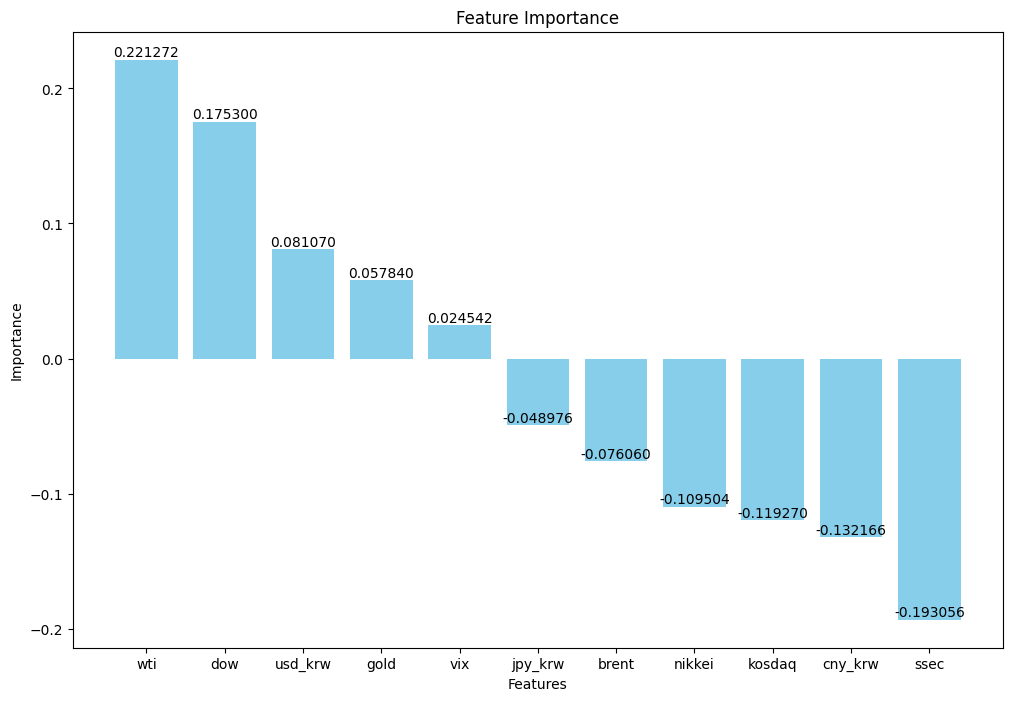

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# 주어진 feature importance 시리즈
feature_importance = pd.Series({
    'wti': 0.221272,
    'dow': 0.175300,
    'usd_krw': 0.081070,
    'gold': 0.057840,
    'vix': 0.024542,
    'jpy_krw': -0.048976,
    'brent': -0.076060,
    'nikkei': -0.109504,
    'kosdaq': -0.119270,
    'cny_krw': -0.132166,
    'ssec': -0.193056
})

# 그래프 그리기
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(feature_importance)), feature_importance.values, tick_label=feature_importance.index, color='skyblue')

# 막대 위에 값 표시하기
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.6f}', ha='center', va='bottom', color='black')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


## 데이터 전처리

### Kospi 200 데이터

In [ ]:
kospi200 = pd.read_csv("/content/drive/MyDrive/코스피 200 과거 데이터.csv")
kospi200.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 05- 14,371.04,371.69,372.10,369.90,122.11K,0.02%
1,2024- 05- 13,370.98,372.10,373.01,368.79,202.21K,-0.03%
2,2024- 05- 10,371.08,372.73,373.80,370.41,141.85M,0.61%
3,2024- 05- 09,368.84,373.70,374.45,368.77,144.38K,-1.40%
4,2024- 05- 08,374.09,372.32,374.12,371.58,126.97M,0.35%


In [ ]:
kospi200 = kospi200.drop(['시가','고가','저가','거래량','변동 %'], axis=1)
kospi200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1739 non-null   object 
 1   종가      1739 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.3+ KB


코스피 데이터의 경우 이걸 기준으로 타겟 데이터 제작할 것이므로 종가 그대로 냅둔다.

### 코스닥, 다우존스, Nikkei, 상해종합지수

In [ ]:
kosdaq= pd.read_csv("/content/drive/MyDrive/코스닥 과거 데이터.csv")
dow = pd.read_csv("/content/drive/MyDrive/다우존스 과거 데이터.csv")
nikkei= pd.read_csv("/content/drive/MyDrive/닛케이 과거 데이터.csv")
ssec=pd.read_csv("/content/drive/MyDrive/상해종합 과거 데이터.csv")

In [ ]:
def df_edit(data):
  data.drop(['종가','시가','고가','저가','거래량'], axis=1, inplace=True)
  print(data.info())

datas=[kosdaq, dow, nikkei, ssec]
for i, data in enumerate(datas):
  df_edit(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1738 non-null   object
 1   변동 %    1738 non-null   object
dtypes: object(2)
memory usage: 27.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1782 non-null   object
 1   변동 %    1782 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1754 non-null   object
 1   변동 %    1754 non-null   object
dtypes: object(2)
memory usage: 27.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 2 columns):
 #   C

### 금융지표

In [ ]:
usd_krw=pd.read_csv("/content/drive/MyDrive/USD_KRW 과거 데이터.csv")
cny_krw=pd.read_csv("/content/drive/MyDrive/CNY_KRW 과거 데이터.csv")
jpy_krw=pd.read_csv("/content/drive/MyDrive/JPY_KRW 과거 데이터.csv")

In [ ]:
interest_rate=pd.read_csv("/content/drive/MyDrive/시장금리(일별)_30000219.csv")
interest_rate= interest_rate.T
interest_rate= interest_rate.drop(['통계표','계정항목','단위','변환'], axis=0)
# 인덱스를 칼럼으로 변환
interest_rate.reset_index(inplace=True)
interest_rate.columns = ['날짜', '콜금리']
# '날짜' 칼럼을 datetime 객체로 변환
interest_rate['날짜'] = pd.to_datetime(interest_rate['날짜'])

# 특정 날짜 범위의 데이터 필터링
filtered_data = interest_rate[(interest_rate['날짜'] >= '2017-04-15') & (interest_rate['날짜'] <= '2024-04-29')]
data={
    '날짜':filtered_data['날짜'],
    '콜금리':filtered_data['콜금리']
}
interest_rate=pd.DataFrame(data)
interest_rate.reset_index(drop=True, inplace=True)
interest_rate


,날짜,콜금리
0,2017-04-17,1.23
1,2017-04-18,1.23
2,2017-04-19,1.23
3,2017-04-20,1.24
4,2017-04-21,1.24
...,...,...
1731,2024-04-23,3.532
1732,2024-04-24,3.519
1733,2024-04-25,3.562
1734,2024-04-26,3.581


In [ ]:
# 시차 고려
# 날짜 하루씩 조정
usd_krw['날짜']= pd.to_datetime(usd_krw['날짜'])
usd_krw['edit_날짜']= usd_krw['날짜'] + pd.Timedelta(days=1)

# 필요없는 칼럼 드랍
usd_krw= usd_krw.drop(['종가','날짜','시가','고가','저가','거래량'], axis=1)
usd_krw=usd_krw.drop(0, axis=0)

# 형식 맞춰주기
usd_krw=usd_krw.rename(columns={'edit_날짜':'날짜'})
usd_krw=usd_krw[['날짜','변동 %']]

usd_krw.head()

,날짜,변동 %
1,2024-05-15,-0.09%
2,2024-05-14,-0.44%
3,2024-05-11,0.39%
4,2024-05-10,0.10%
5,2024-05-09,0.50%


In [ ]:
datas=[cny_krw, jpy_krw]
for i, data in enumerate(datas):
  df_edit(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1848 non-null   object
 1   변동 %    1848 non-null   object
dtypes: object(2)
memory usage: 29.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1848 non-null   object
 1   변동 %    1848 non-null   object
dtypes: object(2)
memory usage: 29.0+ KB
None


### 투자지표

In [ ]:
wti = pd.read_csv("/content/drive/MyDrive/WTI_USD 과거 데이터 (1).csv")
brent=pd.read_csv("/content/drive/MyDrive/브렌트유 선물 과거 데이터 (2).csv")
gold=pd.read_csv("/content/drive/MyDrive/금 선물 과거 데이터 (1).csv")
vix= pd.read_csv("/content/drive/MyDrive/CBOE Volatility Index 과거 데이터 (1).csv")

In [ ]:
def daytime_edit(data):
  # 날짜 하루씩 조정
  data['날짜']= pd.to_datetime(data['날짜'])
  data['edit_날짜']=data['날짜'] + pd.Timedelta(days=1)

  # 필요없는 칼럼 드랍
  data.drop(['날짜','종가','시가','고가','저가','거래량'], axis=1,inplace=True)

  # 형식 맞춰주기
  data=data.rename(columns={'edit_날짜':'날짜'},inplace=True)

In [ ]:
datas= [wti, brent, gold, vix]
for i, data in enumerate(datas):
  daytime_edit(data)

In [ ]:
wti=wti[['날짜','변동 %']]
wti=wti.drop(0, axis=0)
wti.head()

,날짜,변동 %
1,2024-05-15,-0.97%
2,2024-05-14,1.32%
3,2024-05-13,-0.20%
4,2024-05-11,-1.83%
5,2024-05-10,0.47%


In [ ]:
brent=brent[['날짜','변동 %']]
brent=brent.drop(0, axis=0)
brent.head()

,날짜,변동 %
1,2024-05-15,-0.70%
2,2024-05-14,0.69%
3,2024-05-11,-1.30%
4,2024-05-10,0.36%
5,2024-05-09,0.71%


In [ ]:
gold=gold[['날짜','변동 %']]
gold=gold.drop(0, axis=0)
gold.head()

,날짜,변동 %
1,2024-05-15,0.72%
2,2024-05-14,-0.99%
3,2024-05-13,-0.36%
4,2024-05-11,1.48%
5,2024-05-10,0.78%


In [ ]:
vix=vix[['날짜','변동 %']]
vix=vix.drop(0, axis=0)
vix.head()

,날짜,변동 %
1,2024-05-15,-1.32%
2,2024-05-14,8.37%
3,2024-05-11,-1.10%
4,2024-05-10,-2.38%
5,2024-05-09,-1.74%


### 국내 경제지표

### 데이터 통합

In [ ]:
df_lst=[ kospi200, kosdaq, dow, nikkei, ssec,

usd_krw, cny_krw, jpy_krw, interest_rate,

wti, brent, gold, vix]

for i, df in enumerate(df_lst):
  df['날짜']=pd.to_datetime(df['날짜'])

# 각 데이터프레임의 변동 % 칼럼을 해당 데이터프레임의 이름으로 변경

kospi200.rename(columns={'종가': 'kospi200'}, inplace=True)
kosdaq.rename(columns={'변동 %': 'kosdaq'}, inplace=True)
dow.rename(columns={'변동 %': 'dow'}, inplace=True)
nikkei.rename(columns={'변동 %': 'nikkei'}, inplace=True)
ssec.rename(columns={'변동 %': 'ssec'}, inplace=True)
usd_krw.rename(columns={'변동 %': 'usd_krw'}, inplace=True)
cny_krw.rename(columns={'변동 %': 'cny_krw'}, inplace=True)
jpy_krw.rename(columns={'변동 %': 'jpy_krw'}, inplace=True)
interest_rate.rename(columns={'콜금리': 'interest_rate'}, inplace=True)
wti.rename(columns={'변동 %': 'wti'}, inplace=True)
brent.rename(columns={'변동 %': 'brent'}, inplace=True)
gold.rename(columns={'변동 %': 'gold'}, inplace=True)
vix.rename(columns={'변동 %': 'vix'}, inplace=True)

# kospi200을 기준으로 나머지 데이터프레임을 병합
from functools import reduce
lst=[kosdaq, dow, nikkei, ssec,

usd_krw, cny_krw, jpy_krw,

wti, brent, gold, vix]

df = reduce(lambda left, right: pd.merge(left, right, on='날짜', how='left'), [kospi200] + lst)

# 결과 출력
df.head()

,날짜,kospi200,kosdaq,dow,nikkei,ssec,usd_krw,cny_krw,jpy_krw,wti,brent,gold,vix
0,2024-05-14,371.04,0.91%,0.32%,0.35%,-0.06%,-0.44%,-0.11%,-0.28%,1.32%,0.69%,-0.99%,8.37%
1,2024-05-13,370.98,-1.13%,-0.21%,-0.20%,-0.24%,NaN,-0.52%,-0.73%,-0.20%,NaN,-0.36%,NaN
2,2024-05-10,371.08,-0.69%,0.32%,0.49%,0.01%,0.10%,0.31%,0.15%,0.47%,0.36%,0.78%,-2.38%
3,2024-05-09,368.84,-0.27%,0.85%,-0.35%,0.86%,0.50%,0.17%,0.17%,1.20%,0.71%,-0.08%,-1.74%
4,2024-05-08,374.09,0.14%,0.44%,-1.63%,-0.61%,0.20%,0.40%,0.03%,-0.73%,-0.73%,-0.30%,-1.93%


In [ ]:
# 결측치처리
df.fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        1739 non-null   datetime64[ns]
 1   kospi200  1739 non-null   float64       
 2   kosdaq    1739 non-null   object        
 3   dow       1739 non-null   object        
 4   nikkei    1739 non-null   object        
 5   ssec      1739 non-null   object        
 6   usd_krw   1739 non-null   object        
 7   cny_krw   1739 non-null   object        
 8   jpy_krw   1739 non-null   object        
 9   wti       1739 non-null   object        
 10  brent     1739 non-null   object        
 11  gold      1739 non-null   object        
 12  vix       1739 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 176.7+ KB


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 전처리 함수
def preprocess_data(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            try:
                # 문자열을 숫자로 변환 (',' 제거)
                df[column] = df[column].str.replace(',', '').astype(float)
            except ValueError:
                pass
    # 결측치 처리
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    return df

# 데이터 전처리
df = preprocess_data(df)

# 특성 및 타겟 분리
X = df.drop(['날짜', 'kospi200'], axis=1)
y = df['kospi200']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Transformer 블록 정의
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),  # First dense layer
            Dense(embed_dim)  # Output layer
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def build_model(input_shape, embed_dim, num_heads, ff_dim, rate=0.1):
    inputs = Input(shape=(input_shape,))
    x = Dense(input_shape, activation='relu')(inputs)  # 입력 차원과 일치하도록 수정
    x = tf.expand_dims(x, axis=1)  # Add sequence dimension
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, rate)
    x = transformer_block(x)
    x = tf.squeeze(x, axis=1)  # Remove sequence dimension
    outputs = Dense(1)(x)  # Regression output
    model = Model(inputs=inputs, outputs=outputs)
    return model

# 모델 생성 및 컴파일
embed_dim = 11  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

model = build_model(X_train.shape[1], embed_dim, num_heads, ff_dim)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 요약
model.summary()

# 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Attention 가중치 추출
def get_attention_weights(model):
    for layer in model.layers:
        if isinstance(layer, TransformerBlock):
            return layer.att.get_weights()[0]  # Get attention weights (query weights)

attention_weights = get_attention_weights(model)

# 변수 중요도 계산 및 출력
if attention_weights is not None:
    # attention_weights의 형태 확인
    print("Attention Weights Shape:", attention_weights.shape)
    # 마지막 두 차원 평균
    avg_attention_weights = np.mean(attention_weights, axis=(0, 1))  # 평균 가중치 계산
    feature_importance = pd.Series(avg_attention_weights, index=X.columns)
    print(feature_importance.sort_values(ascending=False))
else:
    print("Attention weights not found.")


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_20 (Dense)            (None, 11)                132       
                                                                 
 tf.expand_dims_5 (TFOpLamb  (None, 1, 11)             0         
 da)                                                             
                                                                 
 transformer_block_5 (Trans  (None, 1, 11)             2572      
 formerBlock)                                                    
                                                                 
 tf.compat.v1.squeeze_5 (TF  (None, 11)                0         
 OpLambda)                                                       
                                                           

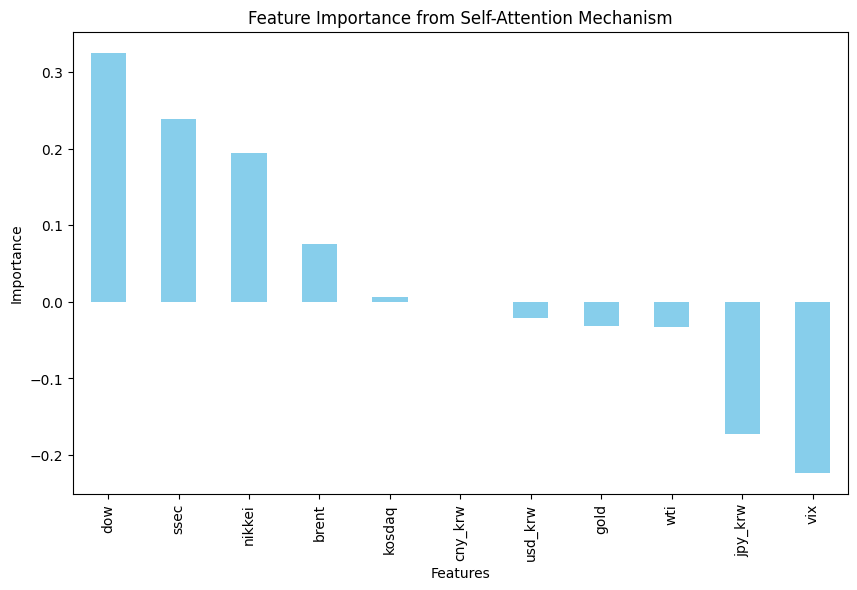

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series({
    'dow': 0.325531,
    'ssec': 0.238900,
    'nikkei': 0.195132,
    'brent': 0.076208,
    'kosdaq': 0.006516,
    'cny_krw': -0.000277,
    'usd_krw': -0.020725,
    'gold': -0.030892,
    'wti': -0.032822,
    'jpy_krw': -0.172221,
    'vix': -0.223214
})

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importance)), feature_importance.values, tick_label=feature_importance.index, color = 'skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.6f}', ha='center', va='bottom', color='black')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

